In [935]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.path as mpath
import pandasql as sql
import sys
from matplotlib.collections import LineCollection
from math import sin, cos, atan2, sqrt, degrees, radians, pi
from geopy.distance import great_circle as distance
from geopy.point import Point
from haversine import haversine,Unit
from scipy.cluster.hierarchy import dendrogram, linkage

In [952]:
#filepath = r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\SegmentTable.csv"
#df = pd.read_csv(filepath)
#df = df.iloc[5500:6000]
#df = df.iloc[:500]

filepath = r"C:\Users\NImi Jithin\Desktop\Studies\sem-3\research track\Measurements\m1.csv"
measuresdf = pd.read_csv(filepath)
#measuresdf =  measuresdf.iloc[2000:5000]
measuresdf =  measuresdf.iloc[0:,]
df = pd.read_excel("C:/Users/NImi Jithin/Desktop/data/SegmentTable.xlsx")
measuresdf = pd.read_excel("C:/Users/NImi Jithin/Desktop/data/ms1.xlsx")

In [953]:
# assigning measured data into different dataframe
len(measuresdf)

5771

In [954]:
#q1 = """SELECT * FROM df WHERE Start_Longitude > 10.34  AND Start_Latitude <51.84 """
#df = sql.sqldf(q1, locals())

In [955]:
len(df)

8862

In [915]:
strtlon, strtlat = df.Start_Longitude.values, df.Start_Latitude.values
endlon, endlat = df.End_Longitude.values, df.End_Latitude.values

In [916]:
pts = np.c_[strtlon, strtlat,endlon, endlat].reshape(len(strtlon), 2, 2)
xtrapts = pts[:len(pts)-0]
#xtrapts = pts[5000:5540,:]

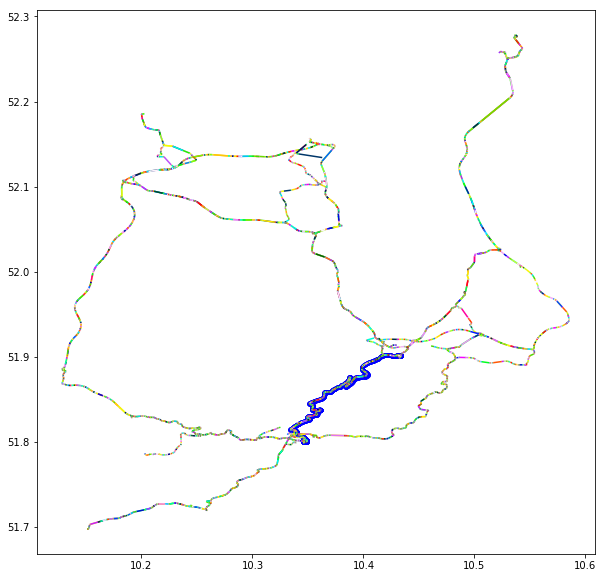

In [937]:
#segments = np.hstack([xtrapts[:-1], xtrapts[1:]])
#plot segments-------------------------------------------------------------
fig = plt.figure()
ax = fig.subplots()
#fig,ax = plt.subplots()
#fig = plt.figure()
#ax.set_xlim([10.30, 10.306])
#ax.set_ylim([51.80, 51.8075])
#ax.margins(x=0.75, y=-0.1) 
plt.rcParams["figure.figsize"] = (10,10)
coll = LineCollection(xtrapts, cmap=plt.cm.gist_ncar)
coll.set_array(np.random.random(xtrapts.shape[0]))

ax.add_collection(coll)
ax.autoscale_view()
#plot measurements ---------------------------------------------------------
xMeasurement, yMeasurement =  measuresdf.long.values, measuresdf.lat.values
ax.scatter(xMeasurement ,yMeasurement,s=7, color='b')
fig.savefig('C:/Users/NImi Jithin/Desktop/data/sample.png',bbox_inches='tight')


In [869]:
"""def midpoint(a, b):
    a_lat, a_lon = radians(a.latitude), radians(a.longitude)
    b_lat, b_lon = radians(b.latitude), radians(b.longitude)
    delta_lon = b_lon - a_lon
    B_x = cos(b_lat) * cos(delta_lon)
    B_y = cos(b_lat) * sin(delta_lon)
    mid_lat = atan2(
        sin(a_lat) + sin(b_lat),
        sqrt(((cos(a_lat) + B_x)**2 + B_y**2))
    )
    mid_lon = a_lon + atan2(B_y, cos(a_lat) + B_x)
    # Normalise
    mid_lon = (mid_lon + 3*pi) % (2*pi) - pi
    return (degrees(mid_lat), degrees(mid_lon))
"""

'def midpoint(a, b):\n    a_lat, a_lon = radians(a.latitude), radians(a.longitude)\n    b_lat, b_lon = radians(b.latitude), radians(b.longitude)\n    delta_lon = b_lon - a_lon\n    B_x = cos(b_lat) * cos(delta_lon)\n    B_y = cos(b_lat) * sin(delta_lon)\n    mid_lat = atan2(\n        sin(a_lat) + sin(b_lat),\n        sqrt(((cos(a_lat) + B_x)**2 + B_y**2))\n    )\n    mid_lon = a_lon + atan2(B_y, cos(a_lat) + B_x)\n    # Normalise\n    mid_lon = (mid_lon + 3*pi) % (2*pi) - pi\n    return (degrees(mid_lat), degrees(mid_lon))\n'

In [957]:
measuresdf.head()

,Unnamed: 0,time,lat,long,dir,velocity,T_outside,brightnessFW,brightnessIR,PredictedSeg
0,0,"Wednesday, November 1, 2017 16:17:31:83508813",51.900768,10.43236,0.0,0.0,12.5,827.398613,2000.0,6471
1,1,"Wednesday, November 1, 2017 16:17:32:33509545",51.900768,10.43236,0.0,0.0,12.5,827.398613,2000.0,6471
2,2,"Wednesday, November 1, 2017 16:17:32:83509277",51.900768,10.43236,0.0,0.0,12.5,828.000000,2000.0,6471
3,3,"Wednesday, November 1, 2017 16:17:33:33509008",51.900768,10.43236,0.0,0.0,12.5,827.395594,2000.0,6471
4,4,"Wednesday, November 1, 2017 16:17:33:83508715",51.900768,10.43236,0.0,0.0,12.5,824.368410,2000.0,6471


In [871]:
#df['Segment_Length'] = ''

In [872]:
#Calculate Segment Midpoints when doing for the first time

"""for indexSeg, rowSeg in df.iterrows():
    a = Point(rowSeg['Start_Latitude'], longitude=rowSeg['Start_Longitude'])
    b = Point(rowSeg['End_Latitude'], longitude=rowSeg['End_Longitude'])
    x = midpoint(a,b)
    df.loc[indexSeg,'Mid_Latitude'] = x[0]
    df.loc[indexSeg,'Mid_Longitude'] = x[1]
    df.loc[indexSeg,'Segment_Length'] = distance(a,b)"""

"for indexSeg, rowSeg in df.iterrows():\n    a = Point(rowSeg['Start_Latitude'], longitude=rowSeg['Start_Longitude'])\n    b = Point(rowSeg['End_Latitude'], longitude=rowSeg['End_Longitude'])\n    x = midpoint(a,b)\n    df.loc[indexSeg,'Mid_Latitude'] = x[0]\n    df.loc[indexSeg,'Mid_Longitude'] = x[1]\n    df.loc[indexSeg,'Segment_Length'] = distance(a,b)"

In [873]:
df.head()

,Segment_ID,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Segment_Length,Mid_Latitude,Mid_Longitude
0,1,10.128375,51.868551,10.128433,51.868380,0.019427,51.868466,10.128404
1,2,10.128384,51.868665,10.128375,51.868551,0.012691,51.868608,10.128379
2,3,10.128433,51.868380,10.128498,51.868291,0.010856,51.868336,10.128466
3,4,10.128443,51.885236,10.128478,51.884912,0.036107,51.885074,10.128461
4,5,10.128471,51.885496,10.128443,51.885236,0.028975,51.885366,10.128457


In [874]:
# df.to_excel(r'C:\Users\NImi Jithin\Desktop\data\SegmentTable.xlsx')

In [875]:
minX = measuresdf['long'].min()
maxX = measuresdf['long'].max()

minY = measuresdf['lat'].min()
maxY = measuresdf['lat'].max()
minX,maxX,minY,maxY

(10.334131, 10.434168, 51.79927, 51.902458)

In [878]:
len(df)

2189

In [563]:
#df['Segment_Length'] = df['Segment_Length'].astype(str).str[:-3].astype(float)

In [877]:
#df = df.query(df['Mid_Longitude']>@minX & df['Mid_Longitude']< @maxX & df['Mid_Latitude']> @minY & df['Mid_Latitude']< @maxY)
#arr = df['Mid_Longitude']
#df.query(arr > 10.334131)

#df['column_name'] >= A & df['column_name'] <= B
#df['Mid_Longitude'] > 10.334131 & df['Mid_Longitude'] < 10.434168
#filterinfDataframe = df[(df['Mid_Longitude'] > 10.334131) & (df['Mid_Longitude'] < 10.434168) &
#                       (df['Mid_Latitude'] > 51.79927) & (df['Mid_Latitude'] < 51.902458)]
df = df[(df['Mid_Longitude'] >= minX) & (df['Mid_Longitude'] <= maxX) &
                      (df['Mid_Latitude'] >= minY) & (df['Mid_Latitude'] <= maxY)]

In [879]:
measuresdf['PredictedSeg'] = ''

In [880]:
def distCalc(measuredPoint, messDistMap):
    for indexSeg, rowSeg in df.iterrows():
        segmentMidPoint  = [rowSeg['Mid_Latitude'],rowSeg['Mid_Longitude']]
        segmentLength = rowSeg['Segment_Length']
        dist = distance(measuredPoint,segmentMidPoint).km
        #arrDistandSegLen = [dist, segmentLength] 
        finalDist = dist/segmentLength
        messDistMap.update({rowSeg['Segment_ID']:finalDist})
    return messDistMap

In [881]:
for indexMess, rowMess in measuresdf.iterrows():
    messDistMap = dict()
    measuredLatLongPoint = [rowMess['lat'],rowMess['long']]
    messDistMap = distCalc(measuredLatLongPoint, messDistMap)
    if bool(messDistMap):
        measuresdf.loc[indexMess,'PredictedSeg'] = min(messDistMap, key=messDistMap.get) 
       
    #if bool(messDistMap):
       # measuresdf.loc[indexMess,'PredictedSeg'] = min(messDistMap.va, key=messDistMap.get) 
    


In [958]:
measuresdf.head()

,Unnamed: 0,time,lat,long,dir,velocity,T_outside,brightnessFW,brightnessIR,PredictedSeg
0,0,"Wednesday, November 1, 2017 16:17:31:83508813",51.900768,10.43236,0.0,0.0,12.5,827.398613,2000.0,6471
1,1,"Wednesday, November 1, 2017 16:17:32:33509545",51.900768,10.43236,0.0,0.0,12.5,827.398613,2000.0,6471
2,2,"Wednesday, November 1, 2017 16:17:32:83509277",51.900768,10.43236,0.0,0.0,12.5,828.000000,2000.0,6471
3,3,"Wednesday, November 1, 2017 16:17:33:33509008",51.900768,10.43236,0.0,0.0,12.5,827.395594,2000.0,6471
4,4,"Wednesday, November 1, 2017 16:17:33:83508715",51.900768,10.43236,0.0,0.0,12.5,824.368410,2000.0,6471


In [883]:
measuresdf.to_excel(r'C:\Users\NImi Jithin\Desktop\data\ms1.xlsx')

In [960]:
q1 = """SELECT distinct(PredictedSeg) FROM measuresdf where PredictedSeg < 3311 order by PredictedSeg """
test = sql.sqldf(q1, locals())


In [961]:
measuresdf = measuresdf.query('PredictedSeg<3311')

In [962]:
df = df[df['Segment_ID'].isin(test['PredictedSeg'])]
#df = df[df['Segment_ID'] == 6471]


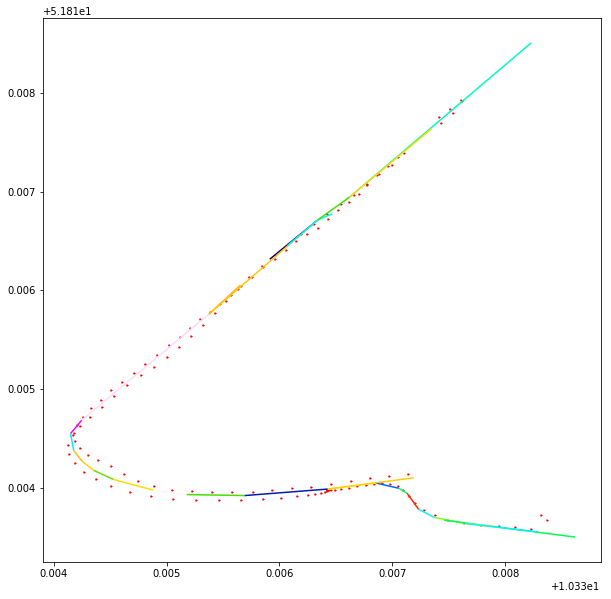

In [951]:
strtlon, strtlat = df.Start_Longitude.values, df.Start_Latitude.values
endlon, endlat = df.End_Longitude.values, df.End_Latitude.values



pts = np.c_[strtlon, strtlat,endlon, endlat].reshape(len(strtlon), 2, 2)
xtrapts = pts[:len(pts)-0]
#xtrapts = pts[5000:5540,:]



#segments = np.hstack([xtrapts[:-1], xtrapts[1:]])
#plot segments-------------------------------------------------------------
fig = plt.figure()
ax = fig.subplots()
#ax.set_xlim([10.39, 10.46])
#ax.set_ylim([51.86, 51.90])
plt.rcParams["figure.figsize"] = (10,10)
coll = LineCollection(xtrapts, cmap=plt.cm.gist_ncar)
coll.set_array(np.random.random(xtrapts.shape[0]))

ax.add_collection(coll)
ax.autoscale_view()

#plot measurements ---------------------------------------------------------
xMeasurement, yMeasurement =  measuresdf.long.values, measuresdf.lat.values
ax.scatter(xMeasurement,yMeasurement,s=1, marker=">",color='r')
fig.savefig('C:/Users/NImi Jithin/Desktop/data/predictedSeg1.png',bbox_inches='tight')